#### Задача 8.3

In [36]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sps

%matplotlib inline

In [37]:
N = 100
sample = sps.cauchy.rvs(size=N)

Возьмем в качестве априорного то, с помощью которого мы уже считали байесовскую оценку на семинаре - $N(a, \sigma^2)$.

По условию $P(|\theta| < 0.5) >= 0.95$. 

a = 0

$[-2\sigma, 2\sigma]$ содержит $95\%$ всех наблюдений $\rightarrow \sigma^2 \leq 0.0625$

In [ ]:
args = (0, 0.0625)

In [38]:
def bayes_est(i, a, b):
    return (sample[:i].sum() + a / b) / (i + 1 / b)

In [39]:
#байесовские оценки
bayes_ests = np.zeros(N)
for i in range(0, N):
    bayes_ests[i] = bayes_est(i + 1, args[0], args[1])
    
#омп
mle = np.array([sample[:i].mean() for i in range(1, N + 1)])

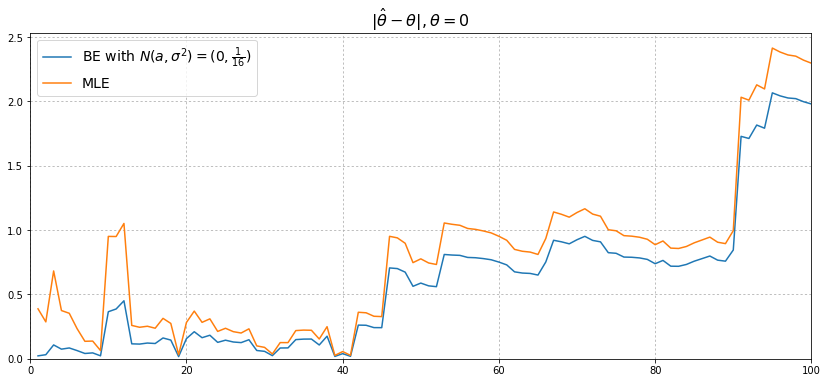

In [40]:
plt.figure(figsize=(14, 6))
plt.plot(np.arange(1, N + 1), np.abs(bayes_ests), 
         label=r"BE with $N(a, \sigma^2) = (0, \frac{1}{16})$")
plt.plot(np.arange(1, N + 1), np.abs(mle), label="MLE")
plt.legend(fontsize=14)
plt.xlim(0, 100)
plt.ylim(bottom=0)
plt.grid(ls=':')
plt.title(r"$|\^\theta - \theta|, \theta = 0$", fontsize=16)
plt.show()

Обе оценки не очень хорошо оценивают $\theta$. При этом точность результов сильно зависят от выборки. Ну а что мы хотим - строим оценку для нормального распределения, а берем выборку из Коши, которое даже среднего не имеет.